<h1>Step 4 Model Selection<h1>

<h2>  The second research question is selecting the best model for predicting the popularity of online news. It is the focus in this step. 

The process in this step includes:1. splitting dataset into training (70%) and testing (30%) sets. 2. Select several classifications models for testing 3.Normalizing features 4. Testing 5. Review testing results and select the best one for the purpose <h2>


In [281]:
# 1. Split data into training and testing sets - 70% training and 30% test


X= df3.drop(df3.columns[[-3,-4]], axis=1)
y=df3['shares_levels']  

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0) 


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(26924, 46)
(26924,)
(11539, 46)
(11539,)


Models that are selected: Random Forest KNN Logistic Regression

There are different techniques for normalizing features.

1) Min Max Scaler - might not be optimal if vairables contain outliners 
2) Box-Cox - It can only be applied to strictly positive data. However,there are negative values in dataset. 
3) Standard Scaler 

In [283]:
#2.Feature Scaling - StandardScaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

#transform data
normalized_X_train = sc.fit_transform(X_train)
normalized_X_test = sc.fit_transform(X_test)



<h2> 1st testing <h2>
<br> 
<h2> A. Random Forest <h2>

<h5>Build the model<h5>

In [284]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Random Forest Classifier with 100 trees(default)
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
RF=clf.fit(X_train,y_train)

prediction=RF.predict(X_test)


<h5> Test the model <h5>

In [285]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Measuring metrics on Testing Data
print(metrics.classification_report(y_test, prediction))



              precision    recall  f1-score   support

           1       0.48      0.39      0.43      2904
           2       0.35      0.10      0.16      2968
           3       0.58      0.85      0.69      5667

    accuracy                           0.54     11539
   macro avg       0.47      0.45      0.43     11539
weighted avg       0.50      0.54      0.49     11539



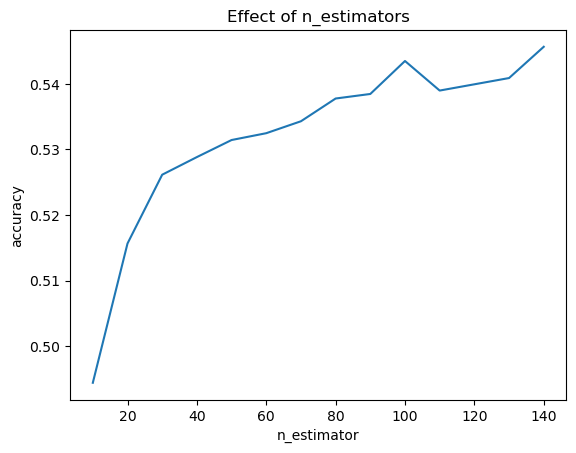

In [177]:
# Try different numbers of n_estimators
estimators = np.arange(10, 150, 10)
accuracy = []

for n in estimators:
    clf.set_params(n_estimators=n)
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, y_pred))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("accuracy")
plt.plot(estimators, accuracy);

In [68]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm

Accuracy_Values=cross_val_score(clf, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.32809443 0.430217   0.46463219 0.48389493 0.47594757 0.48710088
 0.49931409 0.50587444 0.52735675 0.51216105]

Final Average Accuracy of the model: 0.47


In [122]:
X.columns


Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max',
       'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'weekday', 'd

In [386]:
Predictors = ['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max',
       'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'weekday', 'data_channel']

In [124]:
# List the feature importance 


%matplotlib inline
feature_importances = pd.Series(clf.feature_importances_, index=Predictors).sort_values(ascending=False)


feature_importances

kw_avg_avg                      0.041740
kw_max_avg                      0.037158
LDA_02                          0.030710
LDA_01                          0.029948
self_reference_avg_sharess      0.029689
global_subjectivity             0.029589
kw_avg_min                      0.029581
LDA_04                          0.029464
kw_avg_max                      0.029380
self_reference_min_shares       0.029048
average_token_length            0.028842
n_non_stop_unique_tokens        0.028666
LDA_00                          0.028484
global_rate_positive_words      0.028392
n_unique_tokens                 0.027991
avg_positive_polarity           0.027735
n_tokens_content                0.027242
global_sentiment_polarity       0.027108
LDA_03                          0.026630
kw_max_min                      0.026254
global_rate_negative_words      0.025517
avg_negative_polarity           0.025248
self_reference_max_shares       0.023589
weekday                         0.023397
rate_negative_wo

<h2> B. Logistic Regression <h2>

In [58]:
#Import Logistic RegressionModel
from sklearn.linear_model import LogisticRegression

clf_B = LogisticRegression(C=1, penalty ='l1', max_iter=5000, solver='saga')

LR=clf_B.fit(X_train,y_train)

prediction=LR.predict(X_test)


In [57]:

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Measuring metrics on Testing Data
print(metrics.classification_report(y_test, prediction))



C:\Users\jaimeip.000\Anaconda2023\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jaimeip.000\Anaconda2023\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jaimeip.000\Anaconda2023\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.48      0.27      0.35      3619
           2       0.00      0.00      0.00      2253
           3       0.53      0.89      0.66      5667

    accuracy                           0.52     11539
   macro avg       0.34      0.39      0.34     11539
weighted avg       0.41      0.52      0.44     11539



In [59]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm


Accuracy_Values=cross_val_score(clf_B, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.32546695 0.34423876 0.38292824 0.3804597  0.37762233 0.37969276
 0.37441732 0.3777141  0.37336387 0.38919531]

Final Average Accuracy of the model: 0.37


<h2> C. SVM <h2>

In [60]:
#Create a svm Classifier
from sklearn import svm


clf_C = svm.SVC(kernel='rbf') # Linear Kernel
         #You can choose ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ot ‘precomputed’, default=’rbf’

#Train the model using the training sets
clf_C.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf_C.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.4911170812028772


In [61]:

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Measuring metrics on Testing Data
print(metrics.classification_report(y_test, y_pred))


C:\Users\jaimeip.000\Anaconda2023\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jaimeip.000\Anaconda2023\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jaimeip.000\Anaconda2023\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2904
           2       0.00      0.00      0.00      2968
           3       0.49      1.00      0.66      5667

    accuracy                           0.49     11539
   macro avg       0.16      0.33      0.22     11539
weighted avg       0.24      0.49      0.32     11539



In [62]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm


Accuracy_Values=cross_val_score(clf_C, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.32398904 0.32398904 0.32398904 0.32412977 0.32412977 0.32412977
 0.32412977 0.32441613 0.32441613 0.32412977]

Final Average Accuracy of the model: 0.32


<h2> 2nd Testing - Remove the least important 10 features on the features importance  <h2>

In [368]:
df_remove = df3.drop(df3.columns[[7,-13,-6,-12,-5,10,8,15,11,3]], axis=1)




In [369]:
df_remove.shape

(38463, 38)

In [371]:


X2= df_remove.drop(df_remove.columns[[-3,-4]], axis=1)
y2=df_remove['shares_levels']  

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state = 0) 


print(X2_train.shape)
print(y2_train.shape)
print(X2_test.shape)
print(y2_test.shape)

(26924, 36)
(26924,)
(11539, 36)
(11539,)


In [372]:
#2.Feature Scaling - StandardScaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

#transform data
normalized_X_train2 = sc.fit_transform(X2_train)
normalized_X_test2 = sc.fit_transform(X2_test)





In [373]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Random Forest Classifier with 100 trees(default)
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
RF=clf.fit(X2_train,y2_train)

prediction2=RF.predict(X2_test)

In [320]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Measuring metrics on Testing Data
print(metrics.classification_report(y2_test, prediction2))

              precision    recall  f1-score   support

           1       0.47      0.39      0.42      2904
           2       0.34      0.11      0.16      2968
           3       0.58      0.84      0.68      5667

    accuracy                           0.54     11539
   macro avg       0.46      0.44      0.42     11539
weighted avg       0.49      0.54      0.48     11539



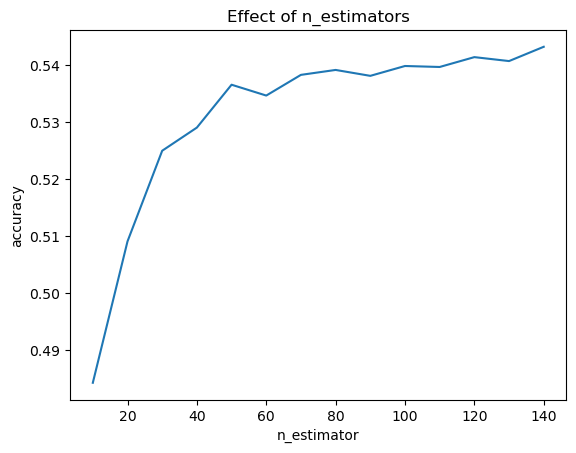

In [181]:
# Try different numbers of n_estimators
estimators = np.arange(10, 150, 10)
accuracy = []

for n in estimators:
    clf.set_params(n_estimators=n)
    clf.fit(X2_train, y2_train)
    y2_pred=clf.predict(X2_test)
    accuracy.append(metrics.accuracy_score(y2_test, y2_pred))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("accuracy")
plt.plot(estimators, accuracy);

In [321]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm

Accuracy_Values=cross_val_score(clf, X2 , y2, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.33805128 0.41013241 0.46950889 0.48223797 0.47821066 0.47414417
 0.49713834 0.51062035 0.51664666 0.5145445 ]

Final Average Accuracy of the model: 0.47


<h3> Conclusion of testing 2 :Accuracy is not afftected after the least important 10 features are removed  <h3>

<h2> Testing 3 - Change the class in variable share level <h2>

In [387]:

# Bin edges that will be used to divide the data into groups
bin_edges = [0,1400,845000]

# Labels for the  levels
bin_names = [1, 2] 


df_remove['shares_levels'] = pd.cut(df2['shares'], bin_edges, labels=bin_names)


In [388]:
df_remove.groupby('shares_levels').shares.count()/df_remove.shares.count()

shares_levels
1    0.508307
2    0.491693
Name: shares, dtype: float64

In [352]:
X2= df_remove.drop(df_remove.columns[[-3,-4]], axis=1)
y2= df_remove['shares_levels']  

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state = 0) 


print(X2_train.shape)
print(y2_train.shape)
print(X2_test.shape)
print(y2_test.shape)

(26924, 36)
(26924,)
(11539, 36)
(11539,)


In [353]:
#2.Feature Scaling - StandardScaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

#transform data
normalized_X_train2 = sc.fit_transform(X2_train)
normalized_X_test2 = sc.fit_transform(X2_test)




In [354]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Random Forest Classifier with 100 trees(default)
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
RF=clf.fit(X2_train,y2_train)

prediction2=RF.predict(X2_test)

In [327]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Measuring metrics on Testing Data
print(metrics.classification_report(y2_test, prediction2))

              precision    recall  f1-score   support

           1       0.65      0.67      0.66      5872
           2       0.65      0.63      0.64      5667

    accuracy                           0.65     11539
   macro avg       0.65      0.65      0.65     11539
weighted avg       0.65      0.65      0.65     11539



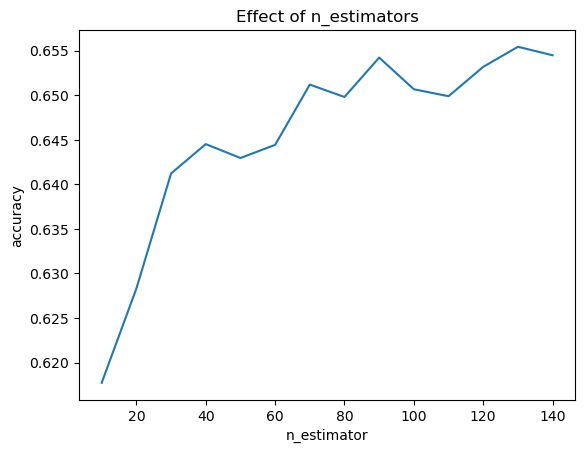

In [217]:
# Try different numbers of n_estimators
estimators = np.arange(10, 150, 10)
accuracy = []

for n in estimators:
    clf.set_params(n_estimators=n)
    clf.fit(X2_train, y2_train)
    y2_pred=clf.predict(X2_test)
    accuracy.append(metrics.accuracy_score(y2_test, y2_pred))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("accuracy")
plt.plot(estimators, accuracy);

In [328]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm

Accuracy_Values=cross_val_score(clf, X2 , y2, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.43671524 0.58735631 0.63785726 0.652909   0.64110356 0.66855455
 0.6679816  0.67393784 0.67979784 0.6566545 ]

Final Average Accuracy of the model: 0.63


In [ ]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm

Accuracy_Values=cross_val_score(clf, X2 , y2, cv=5, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

In [329]:
#Import Logistic RegressionModel
from sklearn.linear_model import LogisticRegression

clf_B = LogisticRegression(C=1, penalty ='l1', max_iter=5000, solver='saga')

LR=clf_B.fit(X2_train,y2_train)

prediction=LR.predict(X2_test)

In [330]:

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Measuring metrics on Testing Data
print(metrics.classification_report(y2_test,prediction))


              precision    recall  f1-score   support

           1       0.59      0.66      0.62      5872
           2       0.60      0.52      0.56      5667

    accuracy                           0.59     11539
   macro avg       0.59      0.59      0.59     11539
weighted avg       0.59      0.59      0.59     11539



In [331]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm


Accuracy_Values=cross_val_score(clf_B, X2 , y2, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.39161971 0.59800763 0.64109214 0.55347359 0.58105554 0.59925339
 0.58071078 0.60201626 0.62231344 0.59331224]

Final Average Accuracy of the model: 0.58


In [333]:
#Create a svm Classifier
from sklearn import svm


clf_C = svm.SVC(kernel='rbf') # Linear Kernel
         #You can choose ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ot ‘precomputed’, default=’rbf’

#Train the model using the training sets
clf_C.fit(X2_train, y2_train)

#Predict the response for test dataset
y_pred = clf_C.predict(X2_test)

print("Accuracy:",metrics.accuracy_score(y2_test, y_pred))

Accuracy: 0.5359216569893405


In [334]:

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Measuring metrics on Testing Data
print(metrics.classification_report(y2_test, y_pred))

              precision    recall  f1-score   support

           1       0.53      0.73      0.62      5872
           2       0.55      0.33      0.41      5667

    accuracy                           0.54     11539
   macro avg       0.54      0.53      0.51     11539
weighted avg       0.54      0.54      0.52     11539



In [335]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm


Accuracy_Values=cross_val_score(clf_C, X2 , y2, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.32398904 0.32427528 0.41008421 0.42149832 0.4371186  0.42910944
 0.4427739  0.42614476 0.41251802 0.40103047]

Final Average Accuracy of the model: 0.4


In [ ]:
<h2> F

In [ ]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
# parameter grid
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],

In [349]:
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
rf=RandomForestClassifier(random_state=1)

params={'n_estimators':sp_randint(5,25),
       'criterion':['gini','entropy'],
       'max_depth':sp_randint(2,10),
       'min_samples_split':sp_randint(2,20),
       'min_samples_leaf':sp_randint(1,20),
       'max_features':sp_randint(2,15)}
rand_search_rfc=RandomizedSearchCV(rf,param_distributions=params,cv=3,random_state=1)

rand_search_rfc.fit(X2,y2)

print(rand_search_rfc.best_params_)

{'criterion': 'entropy', 'max_depth': 9, 'max_features': 2, 'min_samples_leaf': 17, 'min_samples_split': 3, 'n_estimators': 17}


In [348]:
rf=RandomForestClassifier(**rand_search_rfc.best_params_)
rf.fit(X2_train,y2_train)
y_pred_train=rf.predict(X2_train)
y_prob_train=rf.predict_proba(X2_train)[:,1]

y_pred=rf.predict(X2_test)
y_prob=rf.predict_proba(X2_test)[:,1]  #used to find AUC of train and test

from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score

print('Accuracy of Random forest train :',accuracy_score(y_pred_train,y2_train))
print('Accuracy of random forest test :',accuracy_score(y_pred,y2_test))


print('AUC of random forest train :',roc_auc_score(y2_train,y_prob_train))
print('AUC of random forest test :',roc_auc_score(y2_test,y_prob))

Accuracy of Random forest train : 0.7014559500817115
Accuracy of random forest test : 0.6423433573099921
AUC of random forest train : 0.7739339834496234
AUC of random forest test : 0.696084374424521


<h5> Features selection by RFE <h5>

In [375]:
df_remove_feature = df_remove.drop(df_remove.columns[[-3,-4]], axis=1)



In [376]:
df_remove_feature.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs',
       'average_token_length', 'kw_max_min', 'kw_avg_min', 'kw_min_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'weekday', 'data_channel'],
      dtype='object')

In [377]:
# Feature selection

from sklearn.feature_selection import RFE
cols=df_remove_feature.columns
model=RandomForestClassifier()
rfe=RFE(model)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X2,y2)  
#Fitting the data to model
model.fit(X_rfe,y2)
print(rfe.support_)
print(rfe.ranking_)

[False  True  True  True False False  True False  True False  True False
  True  True False False  True  True  True  True False  True  True  True
  True  True False False  True False False False False False False False]
[13  1  1  1  7 19  1  5  1 14  1  9  1  1  2  8  1  1  1  1  4  1  1  1
  1  1 10  6  1  3 15 16 17 12 11 18]


In [378]:
# convert the list to be more readable 


features_names = rfe.feature_names_in_

print(features_names[rfe.support_])

['n_tokens_content' 'n_unique_tokens' 'n_non_stop_unique_tokens'
 'average_token_length' 'kw_avg_min' 'kw_avg_max' 'kw_max_avg'
 'kw_avg_avg' 'self_reference_avg_sharess' 'LDA_00' 'LDA_01' 'LDA_02'
 'LDA_04' 'global_subjectivity' 'global_sentiment_polarity'
 'global_rate_positive_words' 'global_rate_negative_words'
 'avg_positive_polarity']


Text(0.5, 0, 'Feature Importance')

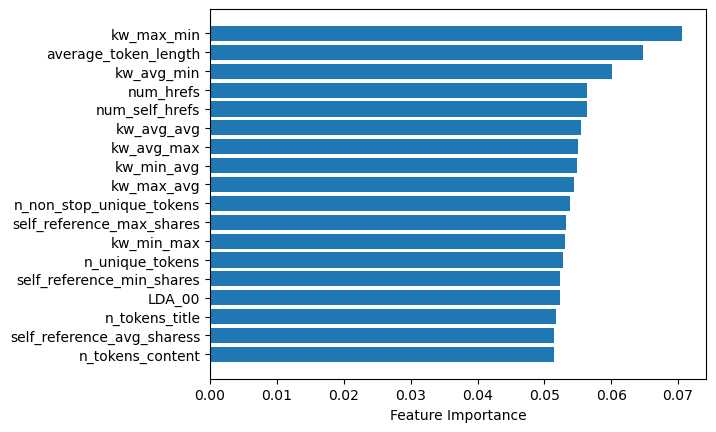

In [379]:
#create feature importance graph
sort = model.feature_importances_.argsort()
plt.barh(features_names[sort], model.feature_importances_[sort])
plt.xlabel("Feature Importance")

In [382]:
df_remove_feature.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs',
       'average_token_length', 'kw_max_min', 'kw_avg_min', 'kw_min_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'weekday', 'data_channel'],
      dtype='object')

In [384]:
Predictors2 = ['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs',
       'average_token_length', 'kw_max_min', 'kw_avg_min', 'kw_min_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'weekday', 'data_channel']

In [385]:

%matplotlib inline
feature_importances = pd.Series(clf.feature_importances_, index=Predictors2).sort_values(ascending=False)


feature_importances

kw_avg_avg                    0.043840
kw_max_avg                    0.041660
LDA_02                        0.034483
kw_avg_max                    0.034045
kw_avg_min                    0.033527
LDA_01                        0.033228
LDA_04                        0.033096
global_subjectivity           0.032933
average_token_length          0.032546
self_reference_min_shares     0.031895
n_non_stop_unique_tokens      0.031857
avg_positive_polarity         0.031637
LDA_00                        0.031547
self_reference_avg_sharess    0.031183
global_rate_positive_words    0.031112
n_unique_tokens               0.031018
n_tokens_content              0.030620
global_sentiment_polarity     0.029875
LDA_03                        0.029814
kw_max_min                    0.029074
avg_negative_polarity         0.028276
global_rate_negative_words    0.028263
weekday                       0.025463
self_reference_max_shares     0.025227
num_hrefs                     0.024474
rate_positive_words      

<h2> 4th round testing - remove 7 common least important features  in 2 feature importance lists <h2>

In [389]:
df_remove.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs',
       'average_token_length', 'kw_max_min', 'kw_avg_min', 'kw_min_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'shares', 'shares_levels', 'weekday',
       'data_channel'],
      dtype='object')

In [405]:
X3= df_remove.drop(df_remove.columns[[4,9,-5,-6,-7,-8,0,-3,-4]], axis=1)



In [407]:
x3.shape

(38463, 29)

In [420]:
X3= df_remove.drop(df_remove.columns[[4,9,-5,-6,-7,-8,0,-3,-4]], axis=1)
y3= df_remove['shares_levels']  

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state = 0) 


print(X3_train.shape)
print(y3_train.shape)
print(X3_test.shape)
print(y3_test.shape)

(26924, 29)
(26924,)
(11539, 29)
(11539,)


In [411]:
#2.Feature Scaling - StandardScaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

#transform data
normalized_X_train3 = sc.fit_transform(X3_train)
normalized_X_test3 = sc.fit_transform(X3_test)


In [415]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Random Forest Classifier with 100 trees(default)
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
RF=clf.fit(X3_train,y3_train)

prediction3=RF.predict(X3_test)

In [413]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Measuring metrics on Testing Data
print(metrics.classification_report(y3_test, prediction3))

              precision    recall  f1-score   support

           1       0.65      0.67      0.66      5872
           2       0.65      0.63      0.64      5667

    accuracy                           0.65     11539
   macro avg       0.65      0.65      0.65     11539
weighted avg       0.65      0.65      0.65     11539



In [414]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm

Accuracy_Values=cross_val_score(clf, X3 , y3, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))




Accuracy values for 10-fold Cross Validation:
 [0.55414652 0.62739455 0.64463444 0.65966882 0.64297687 0.65835566
 0.66067502 0.67986555 0.67802917 0.65334519]

Final Average Accuracy of the model: 0.65


<h2> Fine Tune Model - Random Search <h2>


In [428]:

from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
rf=RandomForestClassifier(random_state=1)

params={'n_estimators':sp_randint(5,25),
       'criterion':['gini','entropy'],
       'max_depth':sp_randint(2,10),
       'min_samples_split':sp_randint(2,20),
       'min_samples_leaf':sp_randint(1,20),
       'max_features':sp_randint(2,15)}
rand_search_rfc=RandomizedSearchCV(rf,param_distributions=params,cv=3,random_state=1)

model_random = rand_search_rfc.fit(X3,y3)


print(rand_search_rfc.best_params_)



{'criterion': 'entropy', 'max_depth': 9, 'max_features': 2, 'min_samples_leaf': 17, 'min_samples_split': 3, 'n_estimators': 17}


In [429]:
rf=RandomForestClassifier(**rand_search_rfc.best_params_)
rf.fit(X3_train,y3_train)
y_pred_train=rf.predict(X3_train)
y_prob_train=rf.predict_proba(X3_train)[:,1]

y_pred=rf.predict(X3_test)
y_prob=rf.predict_proba(X3_test)[:,1]  #used to find AUC of train and test

from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score

print('Accuracy of Random forest train :',accuracy_score(y_pred_train,y3_train))
print('Accuracy of random forest test :',accuracy_score(y_pred,y3_test))


print('AUC of random forest train :',roc_auc_score(y3_train,y_prob_train))
print('AUC of random forest test :',roc_auc_score(y3_test,y_prob))

print('Best score is: '+str(model_random.best_score_))

Accuracy of Random forest train : 0.7023102065072054
Accuracy of random forest test : 0.6443365976254442
AUC of random forest train : 0.7745251412620454
AUC of random forest test : 0.6954234299729443
Best score is: 0.6406936536411617
